# Tarea 2 Geometría computacional y diferencial
María Fernanda Rodríguez Conde

There is an attached file with a set of ordered points in order to develop the suggested activities (datos.txt). As seen in Figure 1, these points are the vertices of the simple polygon that will be triangulated.
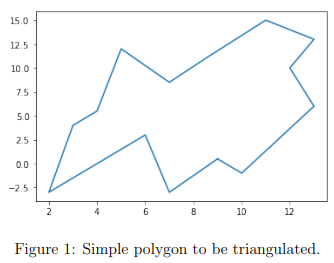

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Punto 1 
**Write down a code able to read the data that is attached and create a
doubly-connected edge list for the simple polygon.**

In [2]:
f = pd.read_csv('datos.txt')

In [3]:
f=list(f)
c=0
for i in f:
    f[c] = f[c].replace('(', '')
    f[c] = f[c].replace(')', '')
    c+=1

In [4]:
nodos = []
for i in range(0,int(len(f)/2)):
    nodos.append([float(f[2*i]), float(f[2*i + 1])])

In [5]:
print(nodos)

[[9.0, 0.5], [7.0, -3.0], [6.0, 3.0], [2.0, -3.1], [3.0, 4.0], [4.0, 5.5], [5.0, 12.0], [7.1, 8.5], [8.5, 11.0], [11.0, 15.0], [13.0, 13.0], [12.0, 10.0], [13.1, 6.0], [10.0, -1.0], [9.0, 0.5]]


In [6]:
def orientacion(x0,y0,x1,y1,x2,y2):
    """
    Definimos la direccion de la linea 02 con respecto a la linea 01
    """
    return (x1-x0)*(y2-y0) - (y1 - y0)*(x2-x0)

class Node: 
    def __init__(self, datax, datay):
        self.x = datax
        self.y = datay
        self.left = None
        self.right = None
        self.in_edge = []
        
    def print_node(self):
        return print("[",self.x,",",self.y,"]")

class Face:
    def __init__(self):
        self.name = None
        self.in_edge = None
        self.ex_edge = None

class HalfEdge:
    def __init__(self, n1, n2):
        self.name = None
        self.tail = n1
        self.face = None
        self.twin = None
        self.prev = None
        self.next = None  
        
    def print_halfedge(self):
        return print(self.name, ": [[",self.tail.x,",",self.tail.y,"]","[",self.tail.right.x,",",self.tail.right.y,"]]")
        
class DCEL:
    def __init__(self):
        self.Nodes = []
        self.HalfEdges = []
        self.Faces = []
        
    def FindNode(self, x, y):
        for i in self.Nodes:
            if i.x == x and i.y == y:
                return i 
    
    def createDCEL(self, lista):
        
        for i in lista:
            x = Node(i[0],i[1])
            self.Nodes.append(x)
        
        for i in range(len(lista)-1):
            n1 = self.FindNode(lista[i][0],lista[i][1] )
            n2 = self.FindNode(lista[i+1][0],lista[i+1][1] )
            n1.right = n2
            n2.left = n1
            h1 = HalfEdge(n1,n2)
            h2 = HalfEdge(n2,n1)
            h1.twin = h2
            h2.twin = h1
            h1.name = 'h'+str(i)
            h2.name = 'h'+str(i+1)
            n1.in_edge.append(h1)
            n2.in_edge.append(h2)
            self.HalfEdges.append(h1)
            self.HalfEdges.append(h2)
            
    def lista_DCEL(self):
        lista = []
        for i in self.Nodes: 
            lista.append([i.x,i.y])
        return lista
            
    def graph_DCEL(self):
        c=0
        for i in self.Nodes:  
            plt.plot(i.x, i.y, "ro") 
            c+=1

        for i in self.HalfEdges:
            xdata=[i.tail.x,i.twin.tail.x]
            ydata=[i.tail.y,i.twin.tail.y]
            plt.plot(xdata,ydata)   
        
        plt.show()
        
    def graph_DCEL1(self):
        c=0
        for i in self.Nodes:  
            plt.plot(i.x, i.y, "ro") 
            c+=1

        for i in self.HalfEdges:
            xdata=[i.tail.x,i.twin.tail.x]
            ydata=[i.tail.y,i.twin.tail.y]
            plt.plot(xdata,ydata)    
        
    def ymonotone_DCEL(self): 
        ys=[]
        for i in range(len(self.Nodes)):
            ys.append(self.Nodes[i].y) 
        for i in range(len(self.Nodes)):
            if self.Nodes[i].y == max(ys):
                root = self.Nodes[i] 
        
        polys=[]
        completa = self.lista_DCEL()
        
        root1 = root
        polygons = [[root.x,root.y]]
        polygons1 = [[root1.x,root1.y]]
        while (root.right.y < root.y and root.right.right.y < root.right.y):
            polygons.append([root.right.x,root.right.y])
            root = root.right
        polygons.append([root.right.x,root.right.y])
        polygons.append([root.right.right.x,root.right.right.y])
        A = [root.right.right.x,root.right.right.y] 
        
        while (root1.left.y < root1.y and root1.left.left.y < root1.left.y):
            polygons1.append([root1.left.x,root1.left.y])
            root1 = root1.left
        polygons1.append([root1.left.x,root1.left.y])
        B = [root1.left.x,root1.left.y]
        
        for i in range(len(polygons1)):
            polygons.append(polygons1[len(polygons1)-i-1]) 

        completa1 = [] 
        completa1 = [i for i in completa if i not in polygons] 
        completa1.insert(0,A)
        completa1.append(B)
        completa1.append(A)
        
        completaF = [polygons]
        completaF.append(completa1) 
        
        return completaF
    
    def ymonotone_DCEL1(self): 
        ys=[]
        for i in range(len(self.Nodes)):
            ys.append(self.Nodes[i].y) 
        for i in range(len(self.Nodes)):
            if self.Nodes[i].y == max(ys):
                root = self.Nodes[i] 
        
        polys=[]
        completa = self.lista_DCEL()
        
        root1 = root
        polygons = [[root.x,root.y]]
        polygons1 = [[root1.x,root1.y]]
        while (root.right.y < root.y and root.right.right.y < root.right.y):
            polygons.append([root.right.x,root.right.y])
            root = root.right
        polygons.append([root.right.x,root.right.y])
        polygons.append([root.right.right.x,root.right.right.y])
        A = [root.right.right.x,root.right.right.y] 
        
        completa1 = [] 
        completa1 = [i for i in completa if i not in polygons] 
        completa1.insert(0,A)
        completa1.append([root1.x,root1.y])
        completa1.append(A)
        
        polygons.append(polygons[0])
        
        completaF = [polygons]
        completaF.append(completa1)   
        return completaF
    
    def graph_camerasDCEL(self, nodes):
        c=0
        for i in self.Nodes:  
            plt.plot(i.x, i.y, "ro") 
            c+=1

        for i in self.HalfEdges:
            xdata=[i.tail.x,i.twin.tail.x]
            ydata=[i.tail.y,i.twin.tail.y]
            plt.plot(xdata,ydata)  
            
        for i in nodes:
            plt.plot(i[0], i[1], "ro",c="b") 
            plt.annotate("cam", (i[0], i[1]),(i[0] + 0.01 , i[1])) 


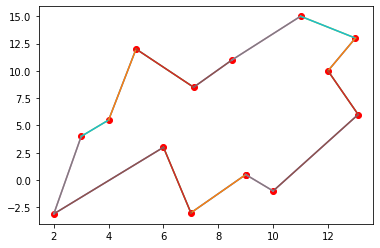

In [7]:
myDCEL = DCEL()
myDCEL.createDCEL(nodos)
 
myDCEL.graph_DCEL()

## Punto 2
**Implement an algorithm able to split the given polygon in to y-monotone
polygons. Give your answer in terms of doubly-connected edge lists. Plot your result.**

In [8]:
A2 = myDCEL.ymonotone_DCEL() 

myDCEL = DCEL()
print(A2[0])
myDCEL.createDCEL(A2[0])
#myDCEL.graph_DCEL1()

myDCEL = DCEL()
print(A2[1])
myDCEL.createDCEL(A2[1])
#myDCEL.graph_DCEL1()

myDCEL = DCEL()
myDCEL.createDCEL(A2[1])
A3 = myDCEL.ymonotone_DCEL1() 

print(A3[0])
myDCEL = DCEL()
myDCEL.createDCEL(A3[0])
#myDCEL.graph_DCEL1()

print(A3[1])
myDCEL = DCEL()
myDCEL.createDCEL(A3[1])
#myDCEL.graph_DCEL1()
plt.show()

[[11.0, 15.0], [13.0, 13.0], [12.0, 10.0], [13.1, 6.0], [10.0, -1.0], [9.0, 0.5], [7.1, 8.5], [8.5, 11.0], [11.0, 15.0]]
[[9.0, 0.5], [7.0, -3.0], [6.0, 3.0], [2.0, -3.1], [3.0, 4.0], [4.0, 5.5], [5.0, 12.0], [7.1, 8.5], [9.0, 0.5]]
[[5.0, 12.0], [7.1, 8.5], [9.0, 0.5], [7.0, -3.0], [6.0, 3.0], [5.0, 12.0]]
[[6.0, 3.0], [2.0, -3.1], [3.0, 4.0], [4.0, 5.5], [5.0, 12.0], [6.0, 3.0]]


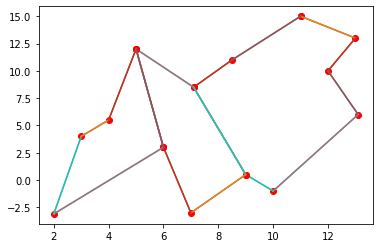

In [9]:
X = A2[0],A3[0],A3[1] 
for i in X:
    myDCEL = DCEL()
    myDCEL.createDCEL(i)

    myDCEL.graph_DCEL1()
plt.show()

## Punto 3
**Implement the triangulation procedure and apply it to each y-monotone
polygon. Give your answer in terms of a doubly-connected edge list. Plot your result.**

In [10]:
triangles = [] 
convex_hull = [  [7.0, -3.0], [2.0, -3.1], [3.0, 4.0],  [5.0, 12.0], [11.0, 15.0], [13.0, 13.0],  [13.1, 6.0], [10.0, -1.0], [9.0, 0.5]]
CVsinHedges = [ [[7.0, -3.0], [2.0, -3.1]], [[3.0, 4.0],  [5.0, 12.0]], [ [5.0, 12.0],[11.0, 15.0]], [[13.0, 13.0],  [13.1, 6.0]], [[10.0, -1.0], [9.0, 0.5]]]
CVHedges = [[[2.0, -3.1], [3.0, 4.0]], [[11.0, 15.0], [13.0, 13.0]], [[13.1, 6.0], [10.0, -1.0]]]
for l in X:
    N = l
    N.sort(reverse=True, key=lambda cord: cord[1]) 
    NN = []
    for i in N:
        if i not in NN:
            NN.append(i)
    for j in range(len(NN)-2):
        max1 = NN[j]
        max2 = NN[j+1]
        max3 = NN[j+2]
        triangle=[max1,max2,max3,max1]
        if [max1,max2] not in CVsinHedges and  [max2,max3] not in CVsinHedges and  [max3,max1] not in CVsinHedges:
            triangles.append(triangle) 
        else: 
            triangles.append([max1,max2,NN[j+3],max1])


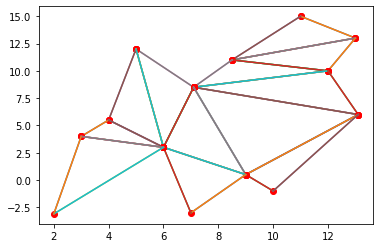

In [11]:
  
for i in triangles:
    myDCEL = DCEL() 
    myDCEL.createDCEL(i)
    for j in myDCEL.Nodes:
        j.print_node 
    myDCEL.graph_DCEL1()
plt.show() 

## Punto 4
**Find the vertices from which a minimum number of cameras could be used
to guard the entire polygon. Plot your result.**

In [12]:
m=[]
for i in triangles:
    m.append(i[0])
    m.append(i[1])
    m.append(i[2])
    
counters =[]
rep = []
for i in m:
    c=m.count(i)
    counters.append([c, i])
    rep.append(c)
    
counters.sort(reverse=True, key=lambda cord: cord[0])
counters1 = []
for i in counters:
    if i not in counters1:
        counters1.append(i)
counters1

[[6, [6.0, 3.0]],
 [5, [7.1, 8.5]],
 [4, [9.0, 0.5]],
 [3, [8.5, 11.0]],
 [3, [12.0, 10.0]],
 [3, [13.1, 6.0]],
 [2, [13.0, 13.0]],
 [2, [5.0, 12.0]],
 [2, [4.0, 5.5]],
 [2, [3.0, 4.0]],
 [1, [11.0, 15.0]],
 [1, [10.0, -1.0]],
 [1, [7.0, -3.0]],
 [1, [2.0, -3.1]]]

In [13]:
nodes1 = nodos
triangles1 = triangles
R4 = [counters1[0][1]]
roott = None
cc=0
bool1 = True

for i in nodes1:
    if i[0]==R4[0][0] and i[1]==R4[0][1]:
        roott = i

for i in nodes1:
    if i[0]>R4[0][0] and i[1]>R4[0][1]:
        nextt = i

c=0
for i in nodes1: 
    if i == nextt: 
        n1 = nodes1[c]
        n2 = nodes1[c+1]
        n3 = nodes1[c+2]
        if orientacion(n2[0],n2[1],n1[0],n1[1],n3[0],n3[1]) >0:
            R4.append(n1)
        c+=1

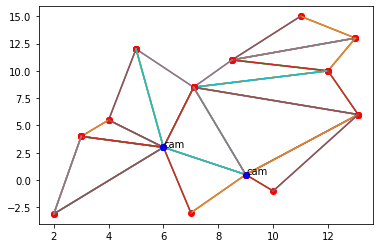

In [14]:
for i in triangles:
    myDCEL = DCEL() 
    myDCEL.createDCEL(i)  
    for j in myDCEL.Nodes:
        j.print_node 
    myDCEL.graph_DCEL1()
myDCEL.graph_camerasDCEL(R4)
plt.show() 